In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import pickle
import sys
import os
from datetime import datetime
from matplotlib import rc
import matplotlib
from utils.crawler_utils import premier_team_full_name,premier_abbr

In [3]:
df = pd.DataFrame()
post_count = []
comments_count = []
teams = []
for i in range(len(premier_abbr)):
    team = premier_abbr[i]
    data = pd.read_csv(f"../data/posts/csvs/{team}.csv")
    post_count.append(data.shape[0])
    data = pd.read_csv(f"../data/comments/gameday/{team}_gameday_comments.csv")
    comments_count.append(data.shape[0])
    teams.append(premier_team_full_name[i])
    

In [4]:
df['team'] = teams
df['post_count'] = post_count
df['comments_count'] = comments_count

In [6]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [40]:
df = df.sort_values(by='post_count',ascending=False)
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(6.4, 3.2)
df = df.sort_values(by='post_count',ascending=False)
ax.bar(df['team'],df['post_count'],color='#0504aa',alpha=0.7,label='posts count')

ax.grid(axis='y', alpha=0.75)
ax.set_xlabel(r'Teams')
ax.set_ylabel('Number of Posts')
ax.set_xticklabels(df['team'],rotation=90)

plt.savefig('../../Final Report/Assets/Number of Posts.pgf', bbox_inches='tight')

/Users/feegee2000/opt/anaconda3/envs/FYP/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


In [41]:
df = df.sort_values(by='comments_count',ascending=False)
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(6.4, 3.2)
df = df.sort_values(by='comments_count',ascending=False)
ax.bar(df['team'],df['comments_count'],color='#0504aa',alpha=0.7,label='comments count')

ax.grid(axis='y', alpha=0.75)
ax.set_xlabel(r'Teams')
ax.set_ylabel('Number of Comments')
ax.set_xticklabels(df['team'],rotation=90)

plt.savefig('../../Final Report/Assets/Number of Comments.pgf', bbox_inches='tight')

/Users/feegee2000/opt/anaconda3/envs/FYP/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


In [43]:
data = pd.read_csv("../data/posts/csvs/premier_posts.csv")
data.shape

(177899, 11)

In [44]:
data["timestamp"] = pd.to_datetime(data["date"])

In [45]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(6.4, 3.2)
n, bins, patches = ax.hist(x=data['timestamp'], bins=30, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

ax.grid(axis='y', alpha=0.75)
ax.set_xlabel(r'Dates')
ax.set_ylabel(r'Number of Posts')

plt.savefig('../../Final Report/Assets/Overview_Posts_Time.pgf', bbox_inches='tight')

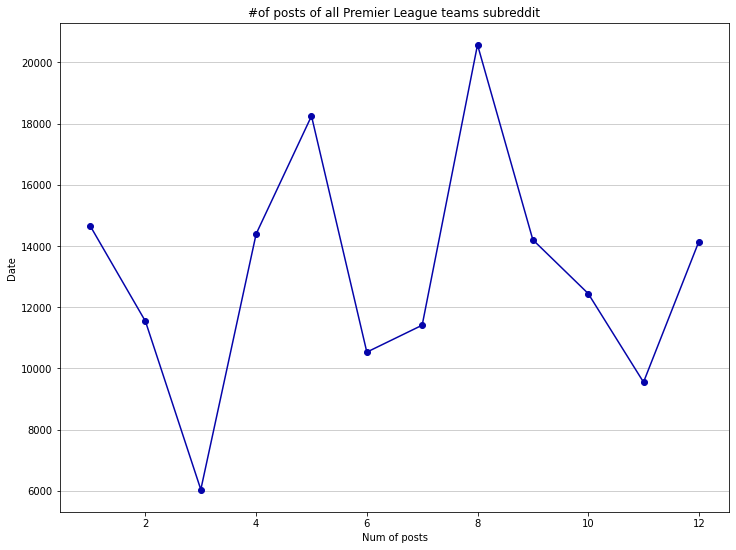

In [9]:
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()
count_by_month = pd.DataFrame(df['date'].groupby(data['timestamp'].apply(lambda x:x.month)).count())

plt.grid(axis='y', alpha=0.75)
ax.plot(count_by_month.index,count_by_month.iloc[:,0],color='#0504aa',marker='o')
plt.xlabel('Num of posts')
plt.ylabel('Date')
plt.title('#of posts of all Premier League teams subreddit')
plt.show()

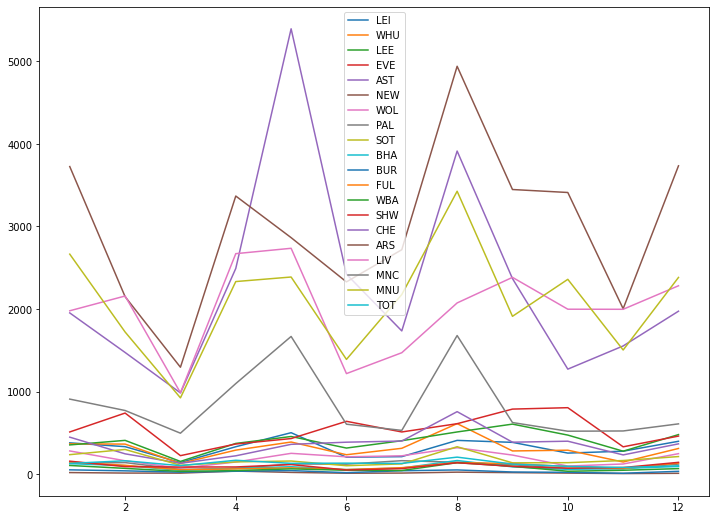

In [10]:
plt.figure(figsize = (12,9))
plt.plot()
ax = plt.gca()
for club_name in premier_abbr:
    temp_data = pd.read_csv(f'../data/{club_name}.csv')
    temp_data["timestamp"] = pd.to_datetime(temp_data["date"])
    count_by_month = pd.DataFrame(temp_data['date'].groupby(temp_data['timestamp'].apply(lambda x:x.month)).count())
    ax.plot(count_by_month.index,count_by_month.iloc[:,0],label = club_name)
ax.legend()

In [7]:
names = []
nums = []
for club_name in premier_abbr:
    temp_data = pd.read_csv(f'../data/{club_name}.csv')
    num = temp_data.shape[0]
    names.append(club_name)
    nums.append(num)
    
rank = [5,6,9,10,11,12,13,14,15,16,17,18,
        19,20,4,8,3,1,2,7]

is_big6 = [False,False,False,False,False,False,False,False,False,False,
           False,False,False,False,True,True,True,True,True,True]

num_of_members = [13260,19679,21253,29631,13716,2260,8607,8234,11254,4766,
                  2155,4430,2157,3562,245661,213934,333192,92097,325465,98124]
    
    
team_info={"team" : names,
           "subreddit":premier_reddit_abbr,
          "num_of_posts" : nums,
           "season_rank" : rank,
           "is_big6" : is_big6,
           "num_of_members":num_of_members}
team_info=pd.DataFrame(team_info,index = team_info["team"]).sort_values(by=['num_of_posts'],ascending=False)
team_info

,team,subreddit,num_of_posts,season_rank,is_big6,num_of_members
ARS,ARS,Gunners,35981,8,True,213934
CHE,CHE,chelseafc,27525,4,True,245661
MNU,MNU,reddevils,25172,2,True,325465
LIV,LIV,LiverpoolFC,23942,3,True,333192
TOT,TOT,coys,21732,7,True,98124
MNC,MNC,MCFC,10020,1,True,92097
EVE,EVE,Everton,6406,10,False,29631
LEE,LEE,LeedsUnited,4801,9,False,21253
AST,AST,avfc,4327,11,False,13716
LEI,LEI,lcfc,3816,5,False,13260


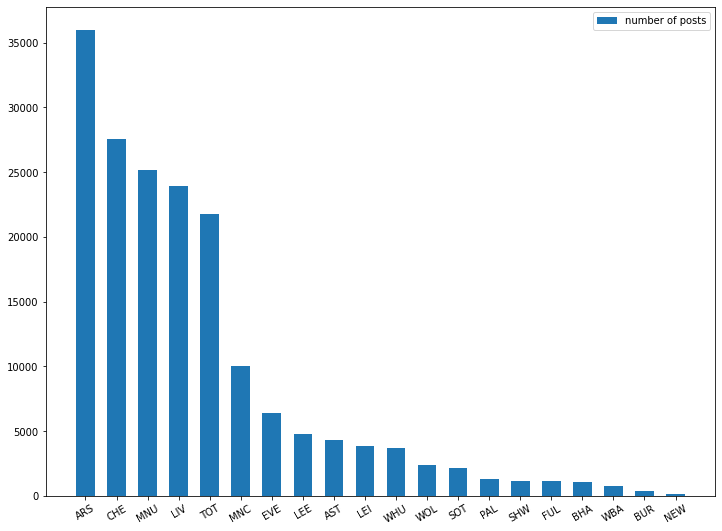

In [22]:
plt.figure(figsize = (12,9))
index = np.arange(team_info.shape[0])
#plt.bar(index,team_info['num_of_posts'],width=0.6,bottom=team_info.num_of_members,label="number of posts")
#plt.bar(index,team_info['num_of_members'],width=0.6,label ="number of members")
plt.bar(index,team_info['num_of_posts'],width=0.6,label="number of posts")
plt.xticks(index,team_info['team'], rotation=30)
plt.legend()
plt.show()